# Multiple Linear Regression Assignment (Bike sharing)

### Problem Statement

A US bike-sharing provider **BoomBikes** has recently found itself lossing revenue due to the effect of corona pandemic and wants to increase its revenue as the world is recovering from the corona outbreak.

### Company wants to find

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
### Our Goal

It is required to build a model using available independent variables for the demand of shared bikes. This is going to be used by the company management for planning effective business strategies. This model will help management to understand the demand dynamics of the new market.

## 1. Importing the libraries

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## 2. Reading and Understanding the data

In [2]:
# reading csv file with pandas as dataframe
df_boombikes = pd.read_csv('day.csv')

In [3]:
# checking first few rows of data
df_boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking out the shape of data
df_boombikes.shape

(730, 16)

In [5]:
# checking info of the data
df_boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# brief description of key indicators of the data
df_boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# checking the axes of the data
df_boombikes.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [8]:
# size of the data
df_boombikes.size

11680

In [9]:
# checking dimensions of the data
df_boombikes.ndim

2

In [10]:
# checking for null values
df_boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Inference
- There are **730 rows** and **16 columns** in the data.
- There are **no null values** in the data.
- Expect for dteday column, which is Object data type. everything else is either int64 or float64.

## 3. Cleaning the data

### 3.1 Dropping null values
Here we do not have any null values so the data here is clean.

### 3.2 Checking for duplicates

In [11]:
# before dropping make a copy of the data
df_boombikes_copy = df_boombikes.copy()

In [12]:
# dropping duplicates
df_boombikes_copy.drop_duplicates(inplace=True)

In [13]:
# checking the shape of the copy for duplicates
df_boombikes_copy.shape

(730, 16)

#### The shape remained same as the original data so I can conclude that there are no duplicates in the data.

### 3.3 Dropping columns

We don't need these following colums:
- 'dteday' as the data for month, and year already given and not required for analysis.
- 'instant' as this is the instance index and isn't required for analysis.
- 'casual' and 'registered' as we already have cnt as the sum of these both and don't need them for analysis for this model.

In [14]:
# dropping columns
df_boombikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

### 3.4 Optimizing data

Categorical variables like season, week, weathersit are better when they are as object rather than numbers for this analysis. so we need to map the data the data with appropriate variables.

In [15]:
# mapping season
df_boombikes.season = df_boombikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
# mapping weathersit
df_boombikes.weathersit = df_boombikes.weathersit.map({1:'Clear',2:'Cloudy',3:'Light_snow_rain',4:'Heavy_snow_rain'})

In [17]:
# mapping weekday
df_boombikes.weekday = df_boombikes.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
# mapping mnth
df_boombikes.mnth = df_boombikes.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [19]:
# verifying results
df_boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
df_boombikes.shape

(730, 12)

### 3.5 Handling Outliers

In [21]:
# checking for extreme values in temp
df_boombikes.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [22]:
# checking for extreme values in atemp
df_boombikes.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

In [23]:
# checking for extreme values in season
df_boombikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

<AxesSubplot:xlabel='yr', ylabel='cnt'>

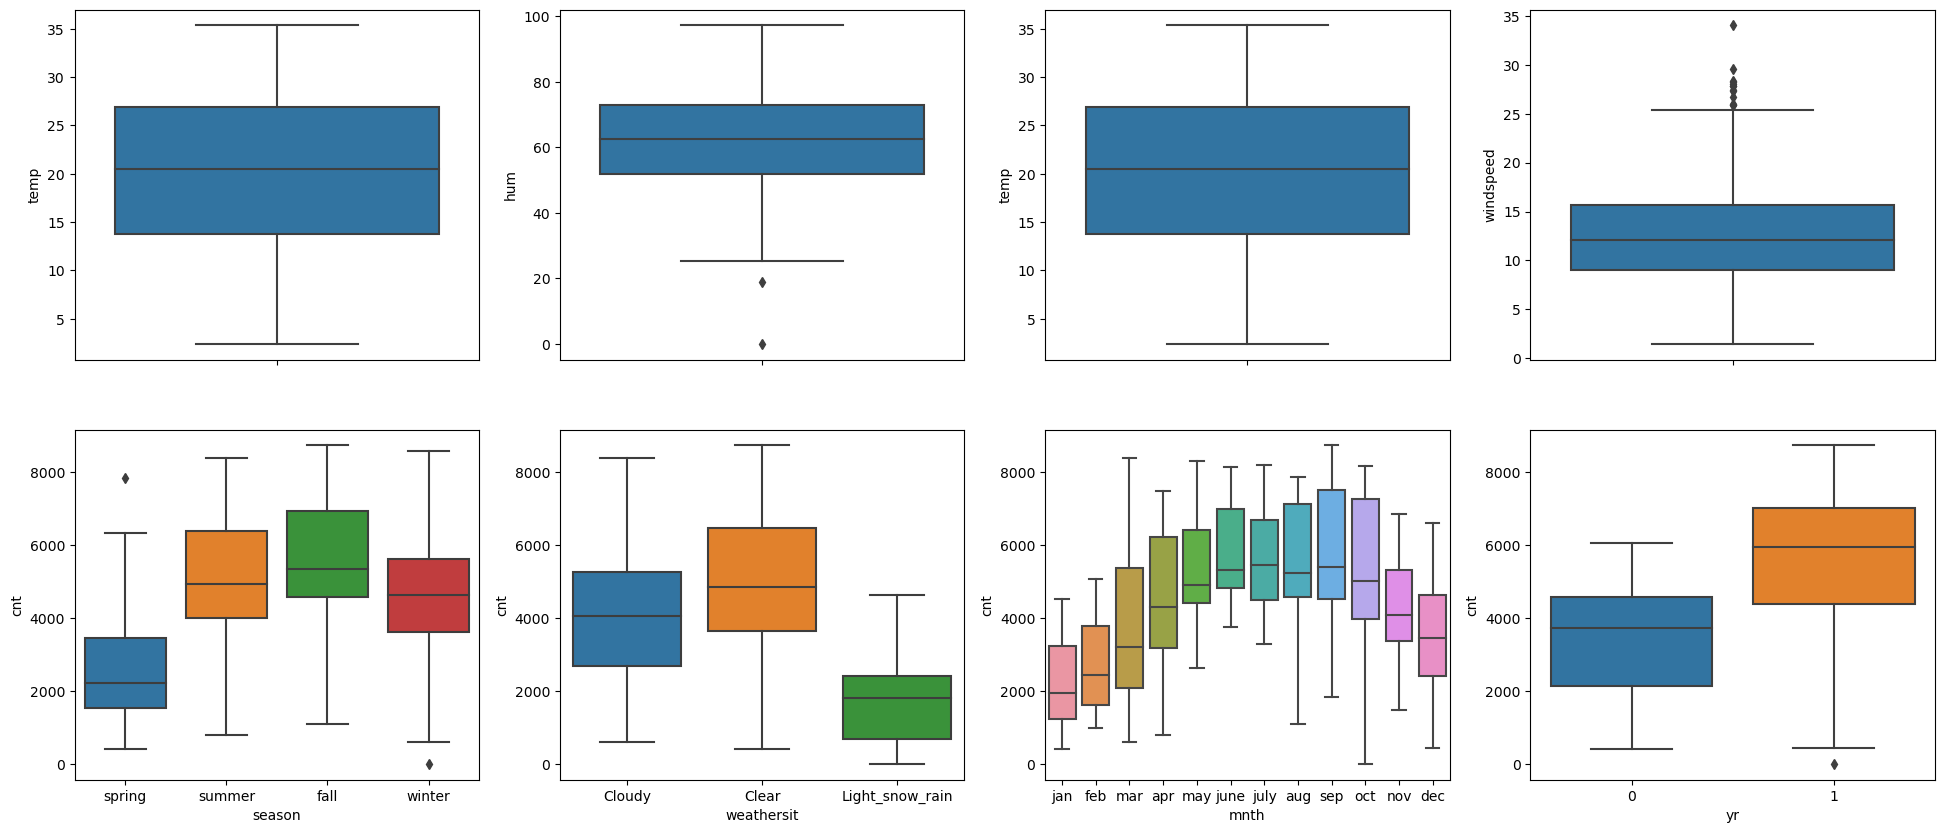

In [24]:
# plotting boxplots to look for outliers for independent variables like temp, atemp, hum, windspeed
plt.figure(figsize = (24,10))
plt.subplot(2,4,1)
sns.boxplot(y = 'temp', data = df_boombikes)
plt.subplot(2,4,2)
sns.boxplot(y = 'hum', data = df_boombikes)
plt.subplot(2,4,3)
sns.boxplot(y = 'temp', data = df_boombikes)
plt.subplot(2,4,4)
sns.boxplot(y = 'windspeed', data = df_boombikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'season',y = 'cnt', data = df_boombikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit',y = 'cnt', data = df_boombikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth',y = 'cnt', data = df_boombikes)
plt.subplot(2,4,8)
sns.boxplot(x = 'yr',y = 'cnt', data = df_boombikes)

**Looks like there are no extreme values in this data set**

## 4. Visualising the Data

Let's create different plots for different variables vs. 'cnt'. Because 'cnt' is the target variable for different variables affecting it.

### 4.1 Finding Demand with Categorical variables

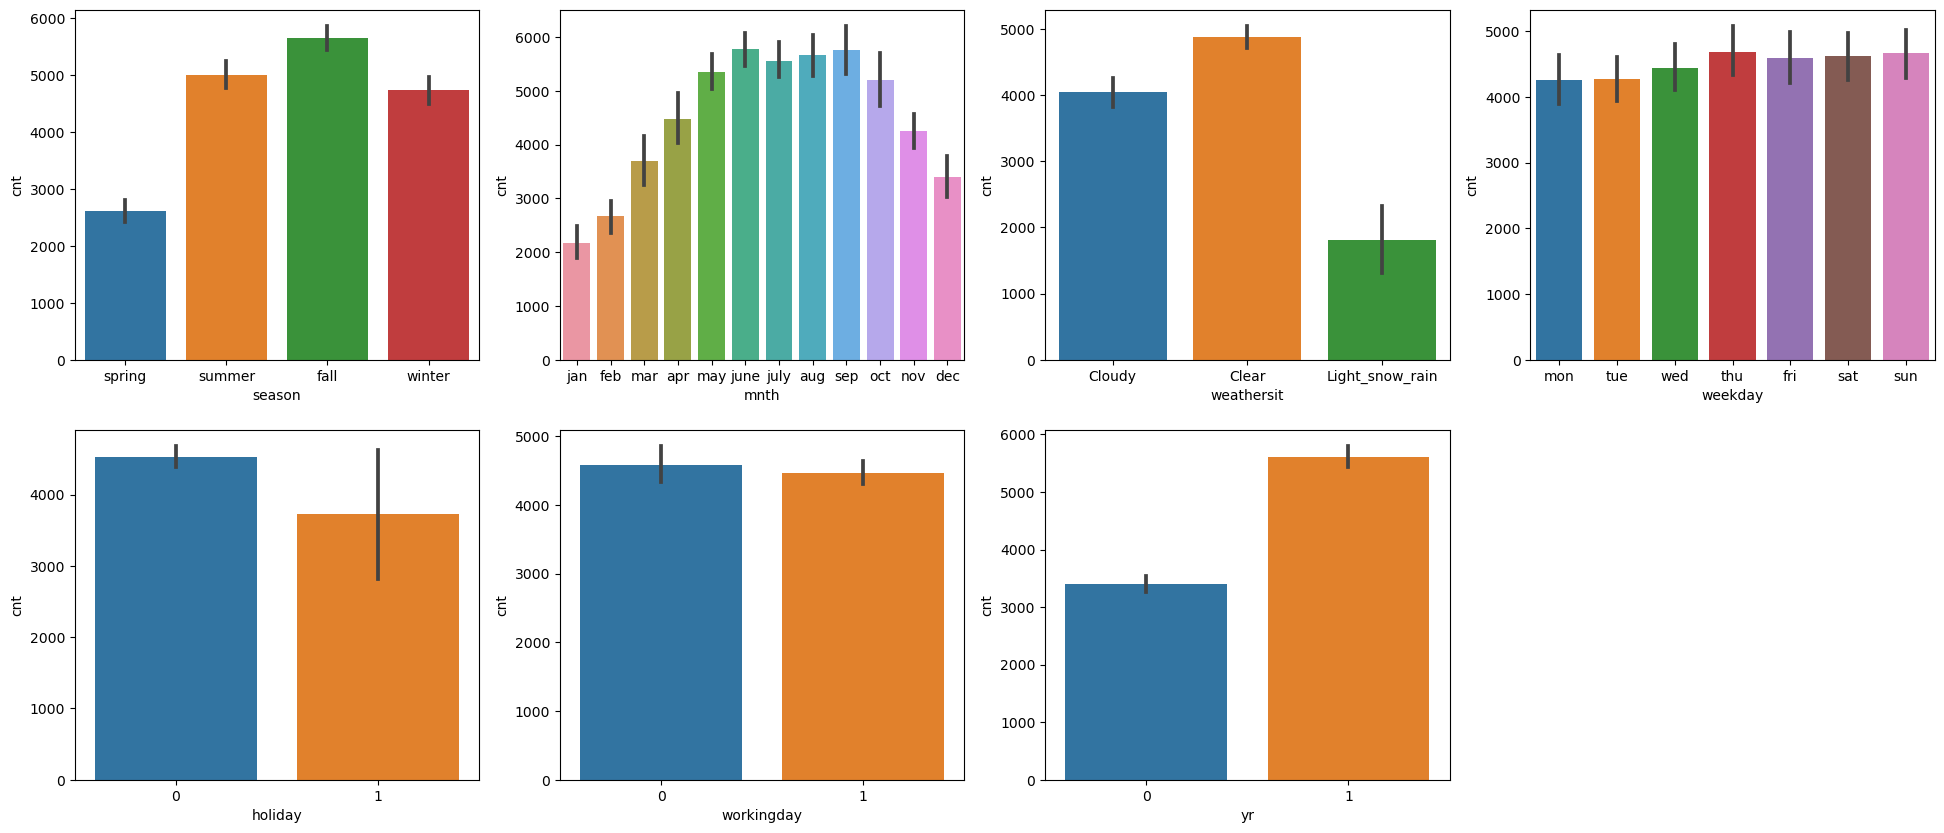

In [25]:
# plotting bar plots with categorical variables against cnt to look for demand indicators

columns = ['season', 'mnth', 'weathersit', 'weekday', 'holiday', 'workingday', 'yr']
plt.figure(figsize= (24,10))

i=1

for column in columns:
    plt.subplot(2,4,i)
    sns.barplot(column, 'cnt', data=df_boombikes)
    i+=1

    
    

**From this data above we can find following**
- There's a huge increase in bike rentals during summer and fall
- Customers prefer using boombikes in the middle months of the year.
- Customers prefer more bike rentals when there's clear sky than cloudy days
- weekday doesn't show any major change
- There's a dip in bike rentals when that day is an holiday.
- There's no major change in bike rentals if its either working day or not
- Compared to the previous year, 2019 has a huge increase in demand which is good for business.

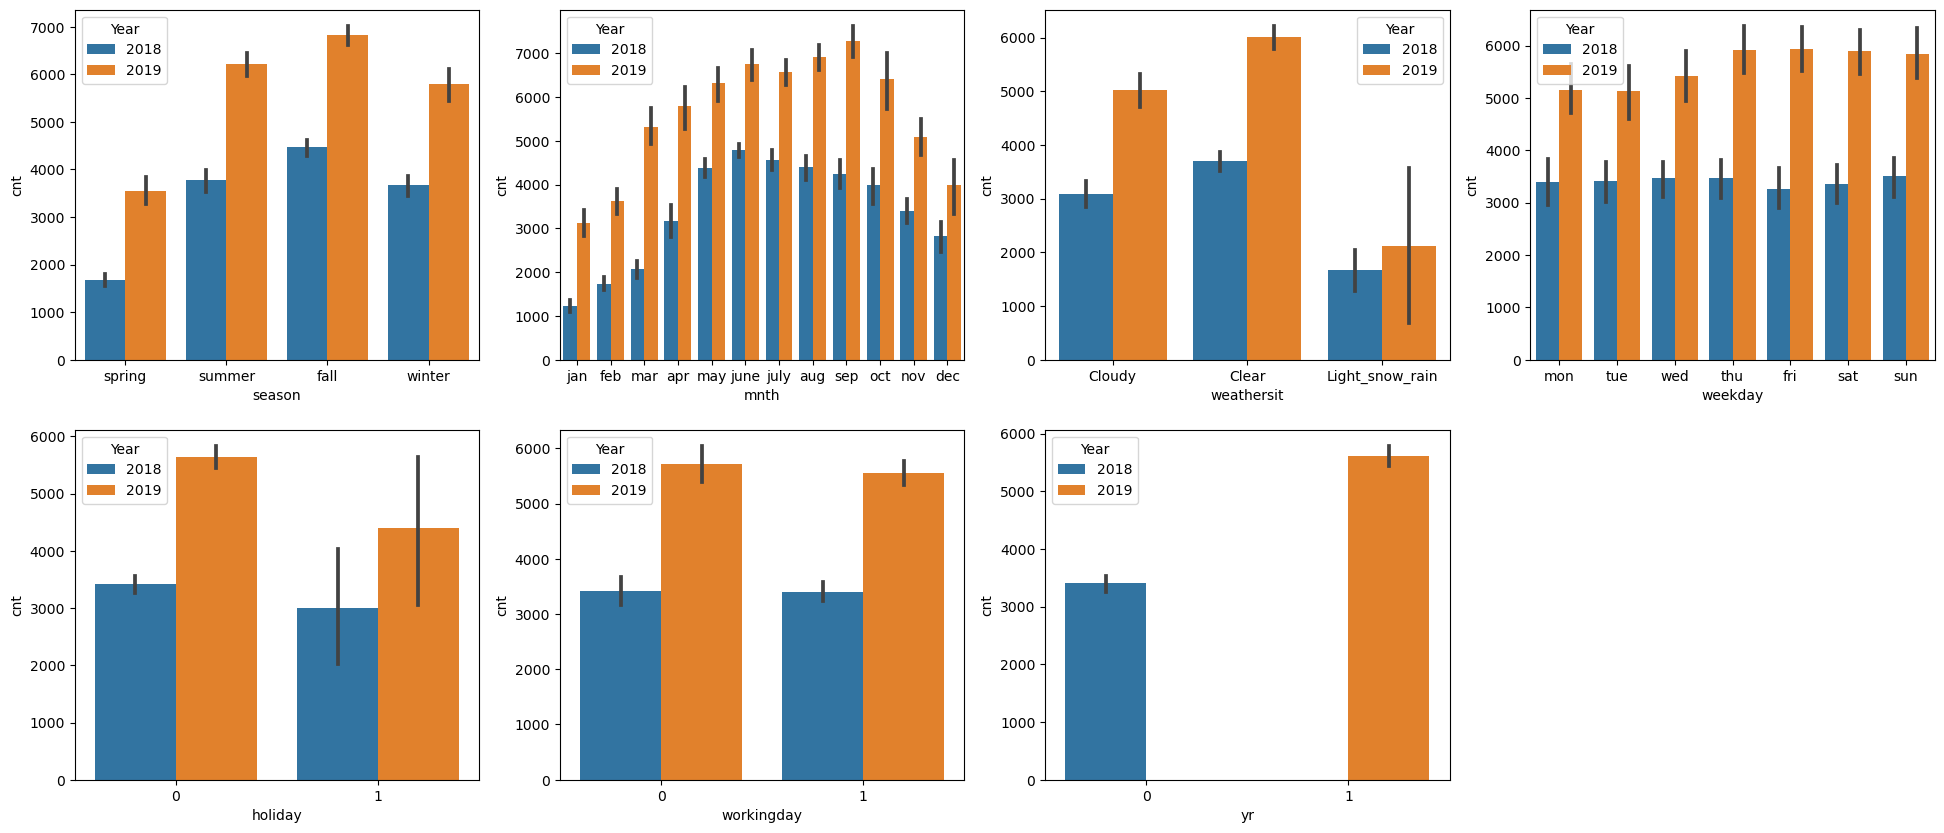

In [26]:
# plotting bar plots with categorical variables against cnt to look for demand indicators in a year

cols = ['season', 'mnth', 'weathersit', 'weekday', 'holiday', 'workingday', 'yr']

plt.figure(figsize= (24,10))
labels = ['2018', '2019']

i=1
for col in cols:
    plt.subplot(2,4,i)
    ax = sns.barplot(col, 'cnt', data = df_boombikes, hue='yr')
    h, l = ax.get_legend_handles_labels()
    ax.legend(h, labels, title="Year")
    i+=1


**This visualisation shows us the following**
- There's an increase in rentals in every season compared to last year majority being in spring
- There is an increase in bike sharing during non-holiday days compared to the previous year
- There is an increase in bike sharing during thursday, friday, saturday and sunday compared to previous year
- There is an substancial increase in bike sharing in 2019 compared to 2018

### 4.2 Finding Demand with Numerical Variables

<Figure size 1800x400 with 0 Axes>

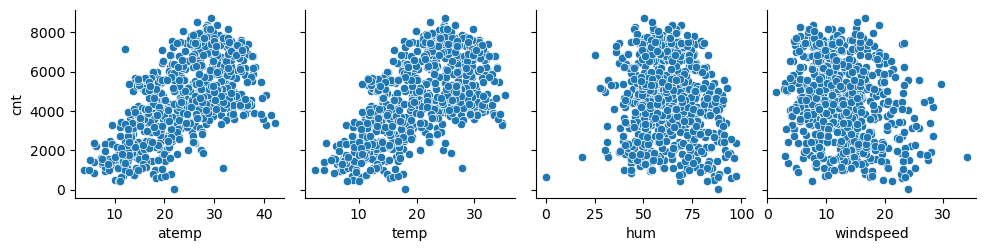

In [27]:
# Making scatter plots for numeric variables against target variable using seaborn

plt.figure(figsize = (18,4))
sns.pairplot(data = df_boombikes, x_vars=['atemp', 'temp', 'hum','windspeed'], y_vars = ['cnt' ])
plt.show()

**What I can conclude**
- **atemp** and **temp** both variables show linear relationship with our target variable **cnt**

### 4.3 Finding linear relationship between all the numerical variables

<Figure size 2000x1500 with 0 Axes>

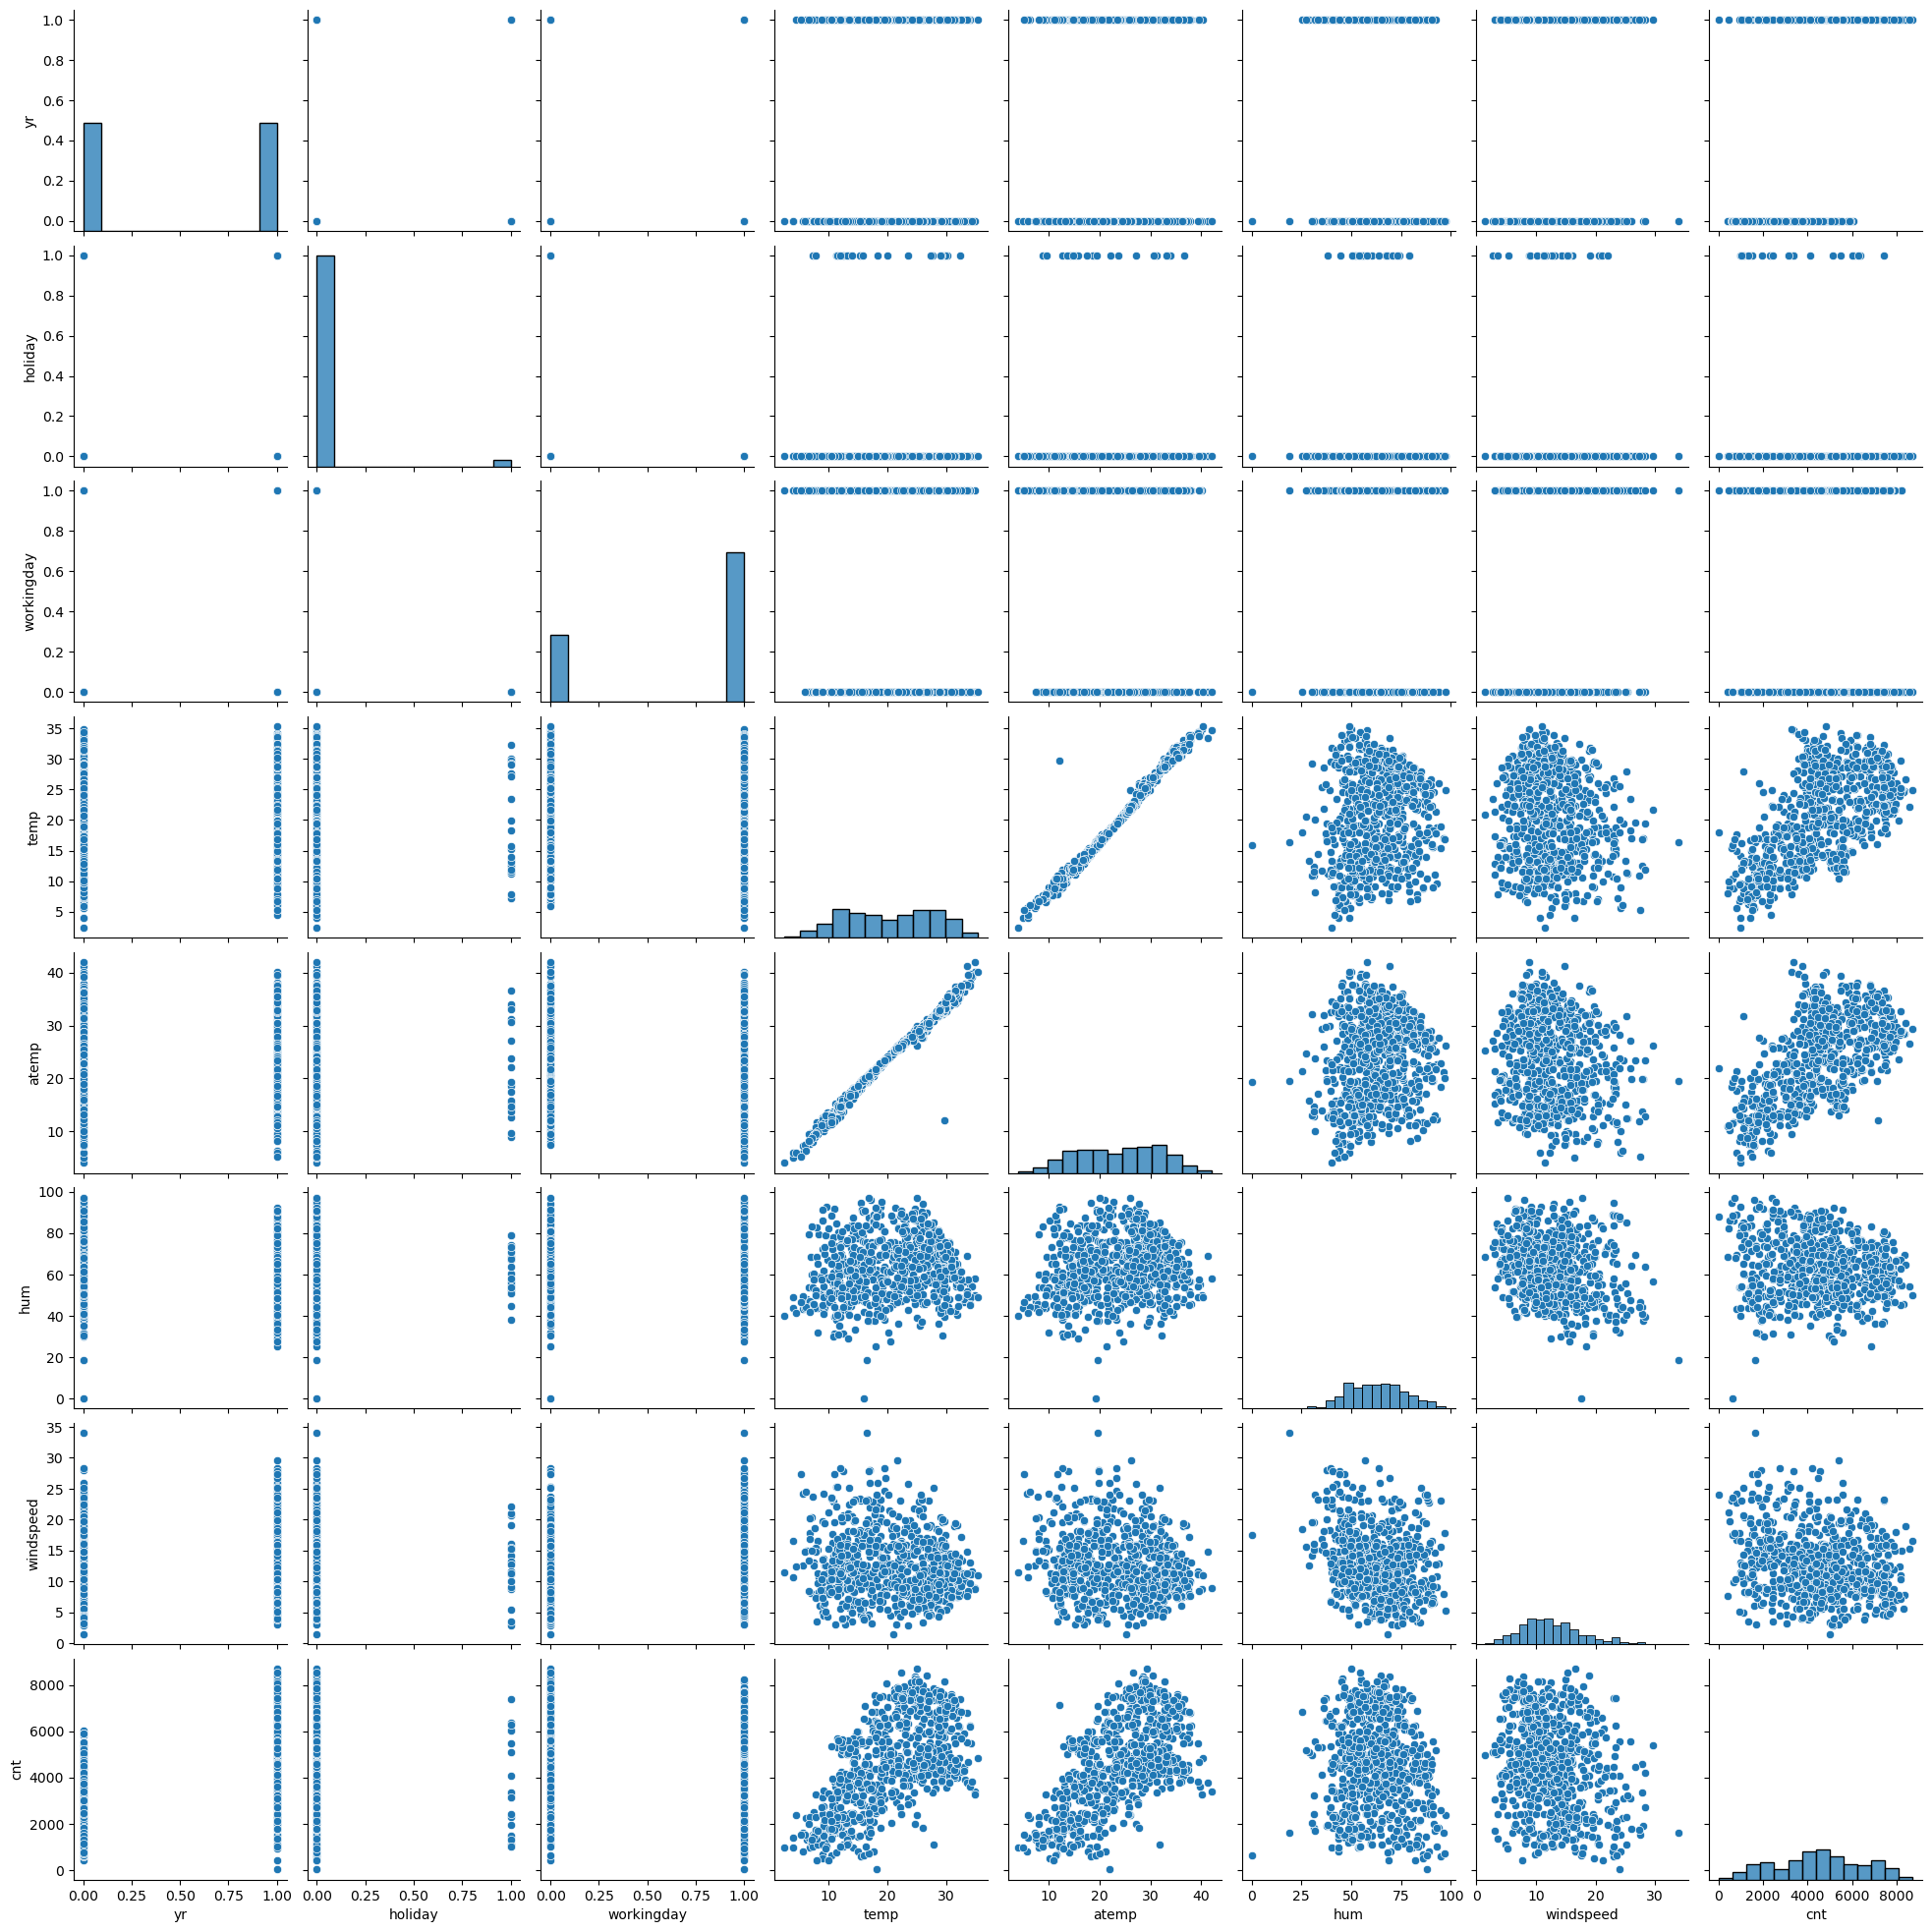

In [28]:
# making a pairplot for all the numerical variables

plt.figure(figsize = (20,15))
sns.pairplot(df_boombikes)
plt.show()

**Inference**
- We can see high co-relation between variables **temp** and **atemp**
- We can also see some linear relationship between **hum** - **cnt** and **windspeed** - **cnt**

### 4.4 Finding Correlation between Variables with Heatmap

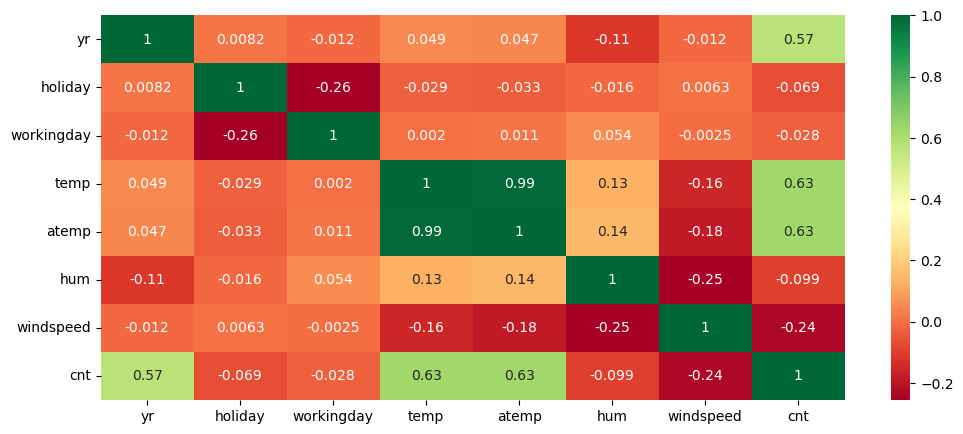

In [29]:
# calculating the correlation coefficient

corrltn = df_boombikes.corr()

# plotting heat map for all the variables in the data
plt.figure(figsize = (12,5))
sns.heatmap(corrltn, annot = True, cmap = 'RdYlGn')
plt.show()


**Inference**
- we can see that temp and atemp are very highly correlated so we need to choose any one of the variable for model builing after finding p-values with respect to other variables later
- we can find some independent varibles like yr and windspeed are correlated with target variable which is a good sign.

## 5. Prepping the Data

In [30]:
# Dummy creation for the varibles month, weathersit, weekday and season varibles.

df_boombikes = pd.get_dummies( data = df_boombikes, columns=['mnth','weathersit','weekday', 'season'], drop_first = True) 

In [31]:
# checking the data after creating dummies
df_boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weathersit_Light_snow_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# shape of new dataframe
df_boombikes.shape

(730, 30)

In [33]:
# checking columns info 
df_boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   mnth_aug                    730 non-null    uint8  
 9   mnth_dec                    730 non-null    uint8  
 10  mnth_feb                    730 non-null    uint8  
 11  mnth_jan                    730 non-null    uint8  
 12  mnth_july                   730 non-null    uint8  
 13  mnth_june                   730 non

## 6. Splitting Data into Training and Testing data

In [34]:
# Splitting data into 70:30 ratio

train_df, test_df = train_test_split(df_boombikes, train_size = 0.7, random_state = 100)

In [35]:
# checking shape of training data

train_df.shape

(510, 30)

In [36]:
# checking shape of test data

test_df.shape

(220, 30)

In [37]:
# checking sample of traning data
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weathersit_Light_snow_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,1,0,0,0,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
# checking sample of testing data
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weathersit_Light_snow_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,0,0,0,1,0


In [39]:
# using Min Max scaler transformer for rescaling
scaler = MinMaxScaler()

In [40]:
# applying scaler to the data
numeric_vars = ['temp','atemp','hum','windspeed','cnt']
train_df[numeric_vars] = scaler.fit_transform(train_df[numeric_vars])

In [41]:
# verifying the rescaling
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weathersit_Light_snow_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,0,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,1,0,0,0,0,1,0


In [42]:
# describing the data
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weathersit_Light_snow_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.029412,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.169124,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Building a Linear Model

In [43]:
# y should contain target variable

y_train = train_df.pop('cnt')

# X should contain independent variables

X_train = train_df

In [44]:
# Recursive Feature Elimination

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
rfe = RFE(lr, n_features_to_select = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [46]:
# List of variables in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light_snow_rain', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

## 8. Elimination of VIF

In [47]:
# function to calculate Variance Inflation factor

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [48]:
# Print Columns selected by RFE
X_train.columns[rfe.support_]


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weathersit_Cloudy',
       'weathersit_Light_snow_rain', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')

In [49]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [50]:
# dataframe with RFE selected variables

X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weathersit_Cloudy',
       'weathersit_Light_snow_rain', 'season_spring', 'season_summer',
       'season_winter']]

In [51]:
# checking shape
X_train_rfe.shape

(510, 15)

In [52]:
# calculate VIF of the dataframe

calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,season_spring,4.37
14,season_winter,4.06
13,season_summer,2.82
10,weathersit_Cloudy,2.32
0,yr,2.09
8,mnth_nov,1.85
6,mnth_jan,1.75


**Humidity shows highest VIF values**

## 9. Building a Linear Regression Model

### 9.1 Model 1 - Starting with all variables selected by RFE

In [53]:
# Building 1st linear regression model

X_train_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          8.15e-189
Time:                        23:52:23   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [54]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,season_winter,2.95
11,season_spring,2.89
12,season_summer,2.24
0,yr,2.07
7,mnth_nov,1.81
5,mnth_jan,1.66
6,mnth_july,1.59
9,weathersit_Cloudy,1.57


**VIF is good now**, lets see if we can further tune it down

### 9.2 Model 2 -  After removing humidity

In [55]:
# building second model after optimizing VIF values

X_train_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          4.75e-186
Time:                        23:52:24   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**Nov has high p-value** we can remove this.

In [56]:
X_train_new = X_train_new.drop(['mnth_nov'], axis = 1)

# Run function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,season_spring,2.89
11,season_summer,2.24
0,yr,2.07
12,season_winter,2.05
5,mnth_jan,1.65
6,mnth_july,1.59
8,weathersit_Cloudy,1.57
7,mnth_sep,1.34


**VIF is good now** let's tune it more

### 9.3 Model 3 - After removing month november

In [57]:
X_train_3 = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train,X_train_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          2.74e-186
Time:                        23:52:24   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**December shows high p-values** we can remove it.

In [58]:
X_train_new = X_train_new.drop(['mnth_dec'], axis = 1)

# Run function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,season_spring,2.75
10,season_summer,2.24
0,yr,2.07
11,season_winter,1.78
4,mnth_jan,1.61
5,mnth_july,1.59
7,weathersit_Cloudy,1.56
6,mnth_sep,1.34


**VIF is good** we can fine tune it more

### 9.4 Model 4 -  After removing December

In [59]:
X_train_4 = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train,X_train_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          8.14e-187
Time:                        23:52:24   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**We can remove January** as it has high p-value

In [60]:
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)

# Run function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,season_summer,2.23
8,season_spring,2.08
0,yr,2.07
10,season_winter,1.78
4,mnth_july,1.58
6,weathersit_Cloudy,1.55
5,mnth_sep,1.34
7,weathersit_Light_snow_rain,1.08


**VIF is good** we can fine tune it even more

### 9.5 Model 5 - After removing January

In [61]:
X_train_5 = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train,X_train_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          5.06e-187
Time:                        23:52:24   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**We can drop july variable** as it has high p-value

In [62]:
X_train_new = X_train_new.drop(['mnth_july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,season_spring,1.99
8,season_summer,1.90
9,season_winter,1.63
5,weathersit_Cloudy,1.55
4,mnth_sep,1.23
6,weathersit_Light_snow_rain,1.08
1,holiday,1.04


**VIF is below 5** which is good indicator for good model

### 9.6 Model 6 - After removing July and attaining VIF < 5

In [63]:
X_train_6 = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train,X_train_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.47e-186
Time:                        23:52:24   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### This Model seems good with F-statistic value 248.4 which is greater than 1 and p-values 1.47e-186 which is almost zero

### This model has very low multicolinearity between predictors

### This model has p-values for all predictors significant

## We can conclude that this model is significant

In [64]:
# Checking the parameters and their coefficient values
lr_6.params

const                         0.190855
yr                            0.234132
holiday                      -0.096316
temp                          0.477737
windspeed                    -0.148098
mnth_sep                      0.090998
weathersit_Cloudy            -0.078741
weathersit_Light_snow_rain   -0.285031
season_spring                -0.055406
season_summer                 0.062076
season_winter                 0.094476
dtype: float64

In [65]:
#Building a model with all columns to select features automatically

def build_lmodel_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [66]:

# Building a model with above columns
lr = build_lmodel_sk(X_train_6,y_train)
print(lr.intercept_,lr.coef_)

0.19085463876200237 [ 0.          0.23413182 -0.09631608  0.47773656 -0.14809801  0.09099761
 -0.0787407  -0.28503144 -0.05540612  0.0620761   0.09447641]


## 10. Model Validation

### 10.1 Residual Analysis

In [67]:
y_train_pred = lr.predict(X_train_6)

In [68]:
#Plotting a histogram of the error terms

def plt_err_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')


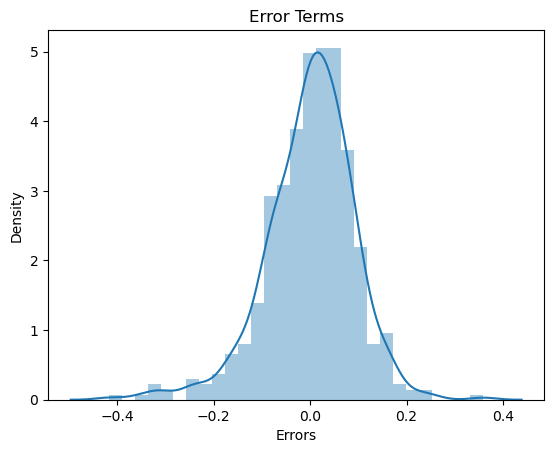

In [69]:
plt_err_dist(y_train, y_train_pred)

**Errors are distribured with mean 0, So everything is good**

### 10.2 Multi Colinearity

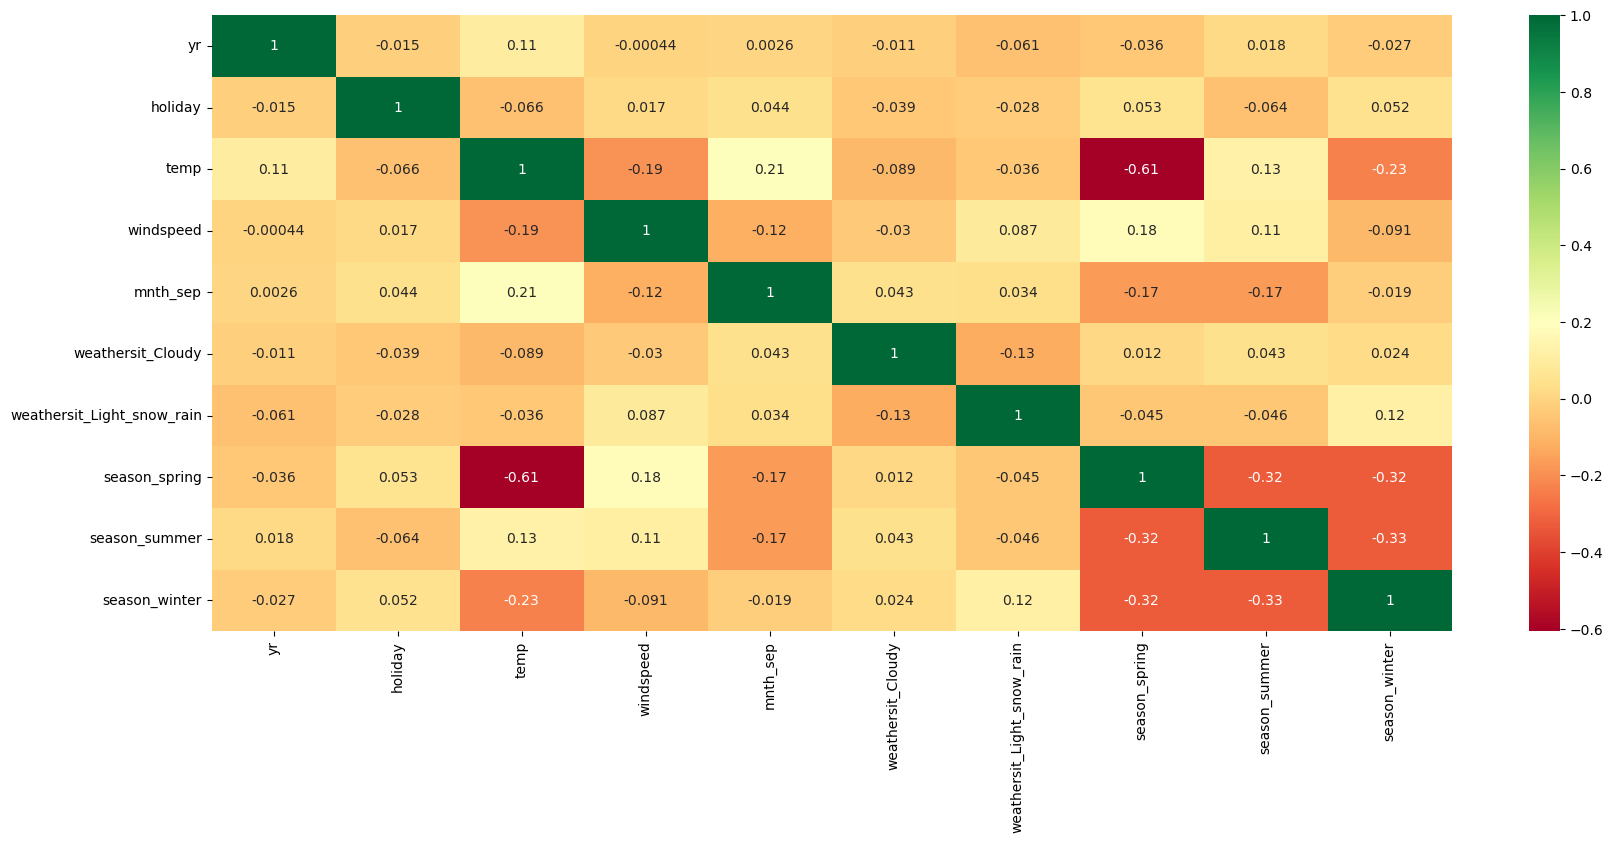

In [70]:
# plotting heat map to see multicolinearity

plt.figure(figsize=(20,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

**Visually we don't see any Multi-colinearity also VIF is less than 5 which is good**

### 10.3 Linearity

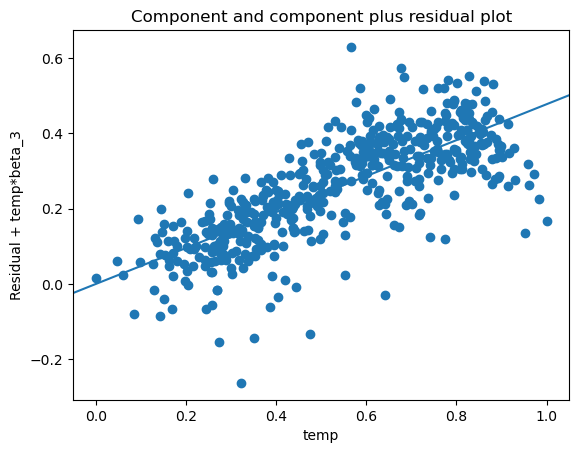

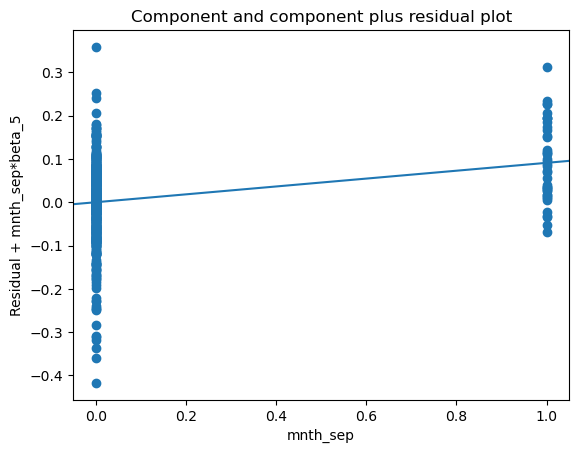

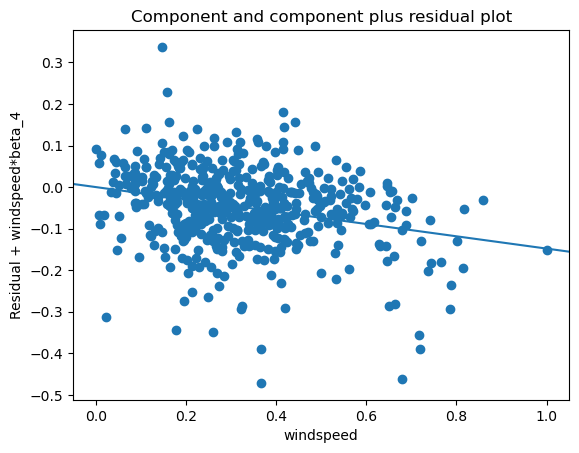

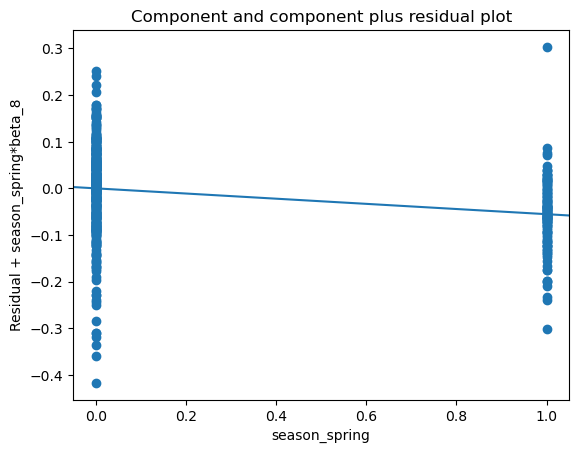

In [71]:
# Linear relationship validation with CCPR plot (Component and component plus residual plot)

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'mnth_sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'season_spring')
plt.show()

**Linearity can be seen from the plots**

### 10.4 Homoscedasticity

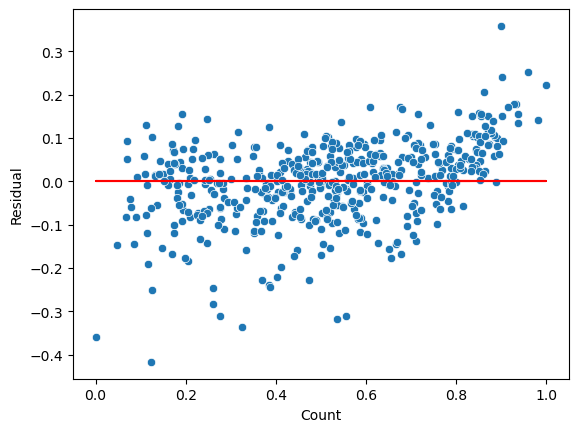

In [72]:
y_train_pred = lr_6.predict(X_train_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**No visible patterns found** thus concludes Homoscedasticity

## 11. Predictions from Model

In [73]:
# Applying scaler on the test data

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
test_df[num_vars] = scaler.transform(test_df[num_vars])
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weathersit_Light_snow_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [74]:
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weathersit_Light_snow_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.027273,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.163248,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# building variables for r2

y_test = test_df.pop('cnt')
X_test = test_df

In [76]:
col = X_train_new.columns

X_test = X_test[col]

# Adding constant variable to test dataframe
X_test_6 = sm.add_constant(X_test)

In [77]:
# assigning y_pred
y_pred = lr_6.predict(X_test_6)

In [78]:
# finding r2 score

r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

## Model Evaluation

Text(0, 0.5, 'y_pred')

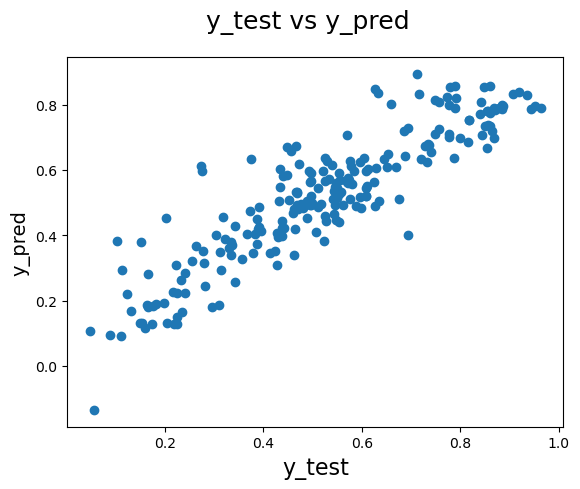

In [79]:
# Plotting y_test and y_pred to understand the spread of the data

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18) 
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 14) 

In [80]:
round(lr_6.params,5)

const                         0.19085
yr                            0.23413
holiday                      -0.09632
temp                          0.47774
windspeed                    -0.14810
mnth_sep                      0.09100
weathersit_Cloudy            -0.07874
weathersit_Light_snow_rain   -0.28503
season_spring                -0.05541
season_summer                 0.06208
season_winter                 0.09448
dtype: float64

In [81]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


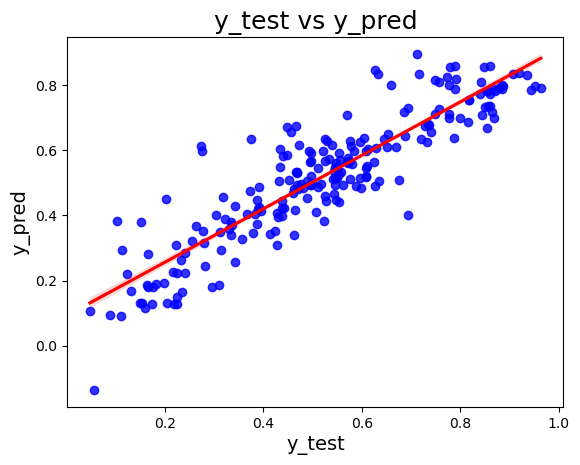

In [82]:
# Visualizing the best fit line on the test data

plt.figure()

#plotting regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=18)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=14)
plt.show()

## Interpretation of the Model

- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.


### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.